# Data Collection & Exploration

In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv(r"insurance.csv")
data = df

In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
df.shape

(1338, 7)

In [50]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
df.dropna(inplace=True)

In [52]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


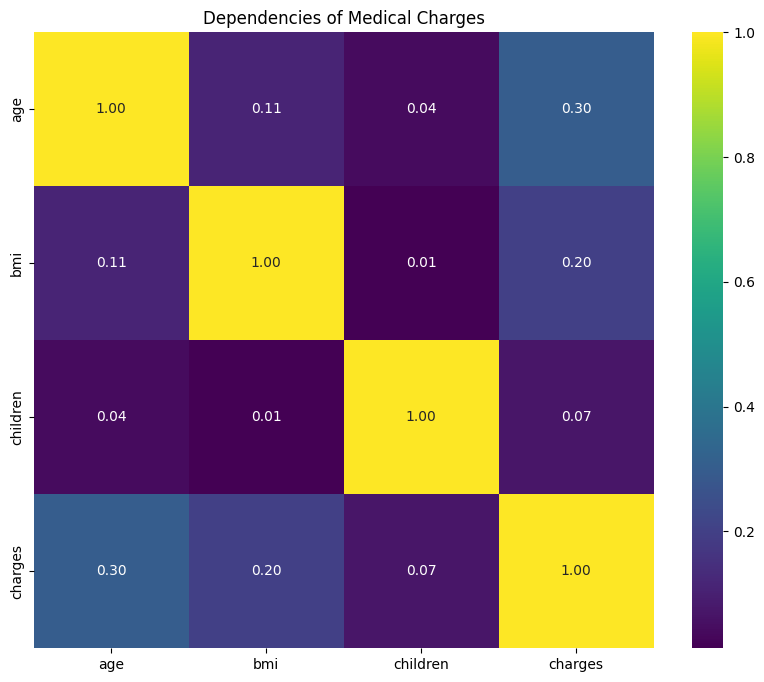

In [55]:
corr = df.corr(numeric_only=True) 

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()


In [56]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [57]:
df.select_dtypes(include=['object']).describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [58]:
cat=df.select_dtypes(include=['object']).columns.tolist()
for i in cat:
    obs=df[i].value_counts()
    avg_claim=df.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of Policyholders":obs, "Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable: {}".format(i)))

,Number of Policyholders,Average Claim Amount
sex,,
male,676,"$13,956.75"
female,662,"$12,569.58"


,Number of Policyholders,Average Claim Amount
smoker,,
no,1064,"$8,434.27"
yes,274,"$32,050.23"


,Number of Policyholders,Average Claim Amount
region,,
southeast,364,"$14,735.41"
northwest,325,"$12,417.58"
southwest,325,"$12,346.94"
northeast,324,"$13,406.38"


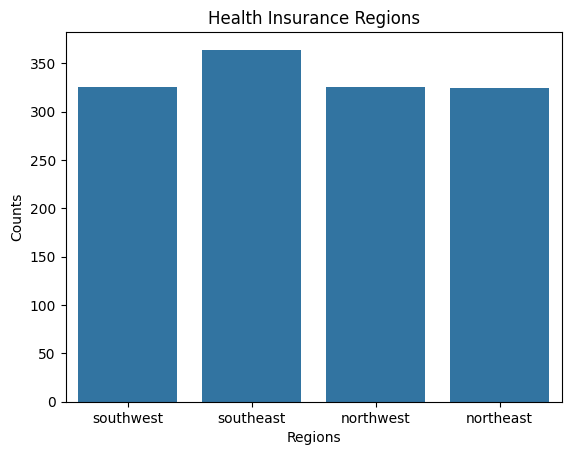

In [59]:

# Let's count the regions
southwest = len(df[df['region'] == 'southwest'])
southeast = len(df[df['region'] == 'southeast'])
northwest = len(df[df['region'] == 'northwest'])
northeast = len(df[df['region'] == 'northeast'])

# Create a bar chart
sns.barplot(x=['southwest', 'southeast', 'northwest', 'northeast'], y=[southwest, southeast, northwest, northeast])

#To add labels and title
plt.xlabel("Regions")
plt.ylabel("Counts")
plt.title("Health Insurance Regions")
plt.show()

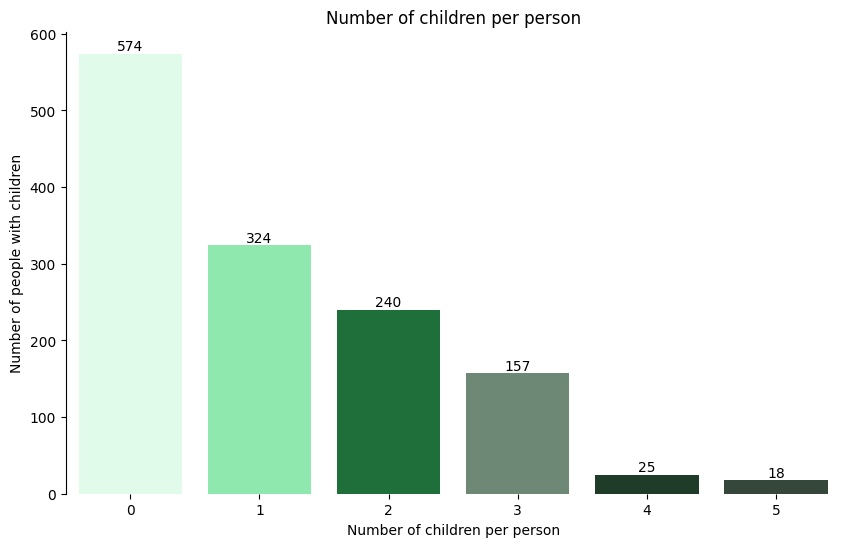

In [60]:
color_scheme = ['#dbffe7','#80f7a8','#107d34', '#688e74','#194126','#314a39']
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = df['children'], palette =color_scheme)
plt.title('Number of children per person')
plt.xlabel('Number of children per person')
plt.ylabel('Number of people with children')

for i in ax.containers:
    ax.bar_label(i)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

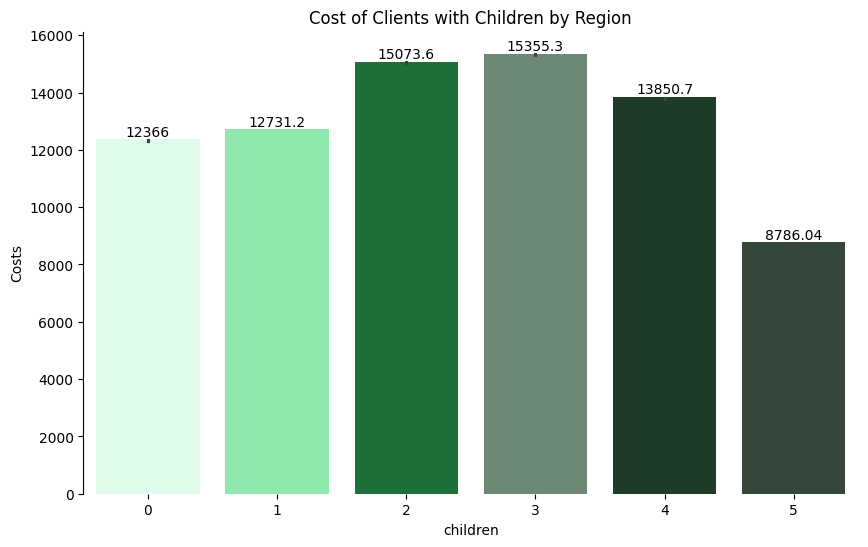

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'region' is the column with region names and 'count' is the count of people
sns.barplot(x = df['children'], y = df['charges'], ci= 1, palette=color_scheme)
plt.ylabel('Costs')
plt.title('Cost of Clients with Children by Region')

# Labeling the bars with their respective counts
for container in ax.containers:
    ax.bar_label(container)

# Removing unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False) # Usually, we want to keep the bottom spine visible for the x-axis.
ax.spines['right'].set_visible(False)

plt.show()

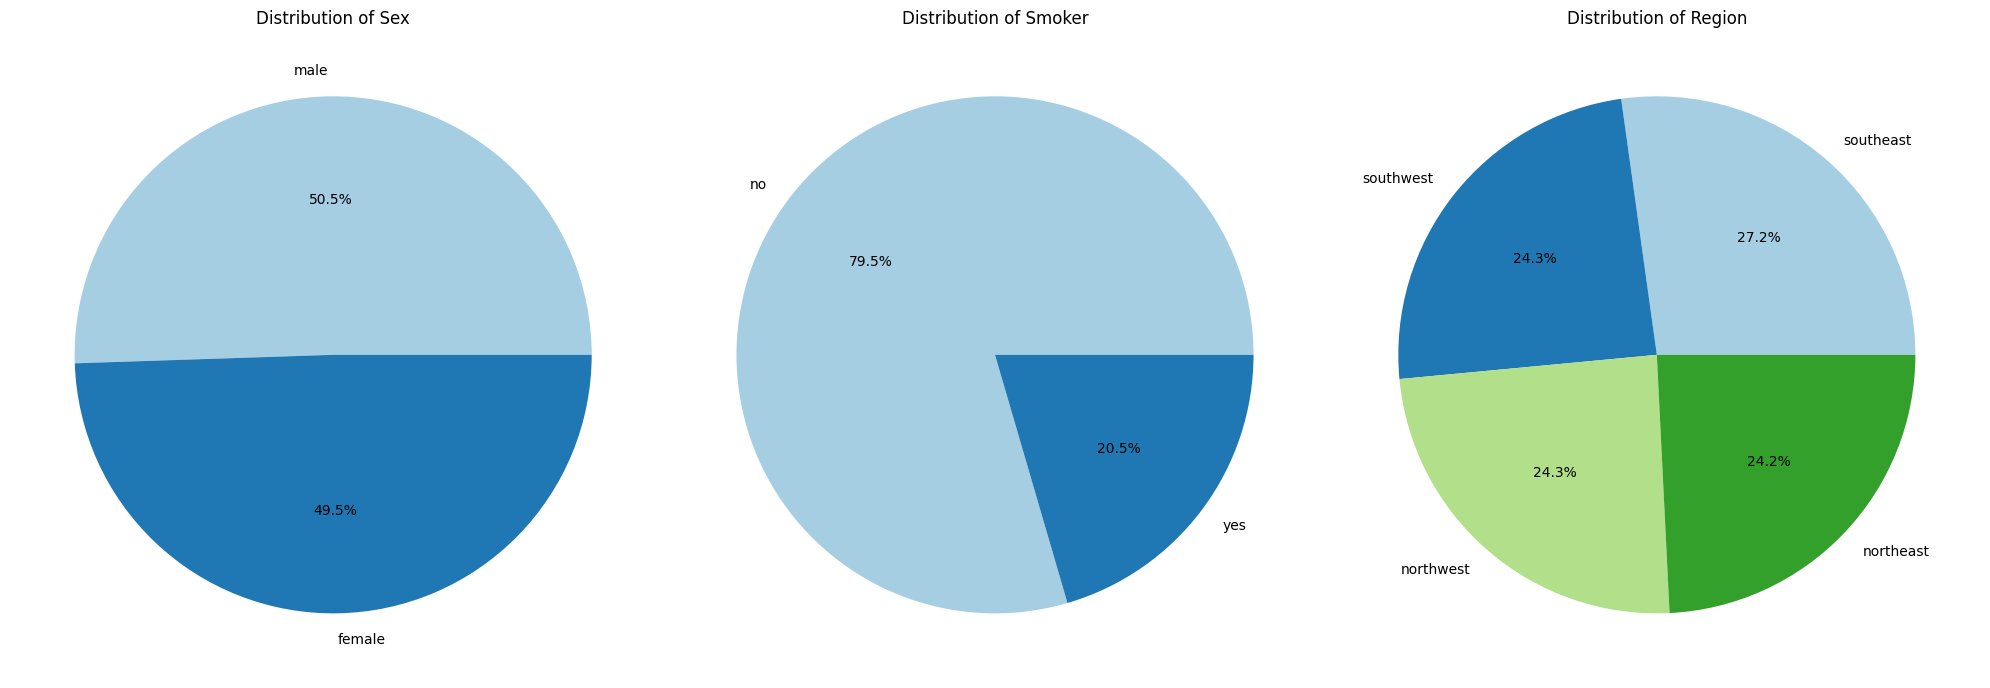

In [62]:
# Features to plot
features = ['sex', 'smoker', 'region']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plot each feature
for i, col in enumerate(features):
    ax = axes[i]
    x = df[col].value_counts()
    ax.pie(x.values, labels=x.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(x))))
    ax.set_title(f'Distribution of {col.capitalize()}')

# Adjust layout
plt.tight_layout()
plt.show()

In [63]:
import plotly.io as pio
pio.renderers.default = "vscode"


from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)
px.defaults.template = "plotly_white"
plot_df=df.copy()
fig = px.box(plot_df, x="region", y="charges", color="region", 
             notched=True, points="outliers", height=600,
             title="Distribution of Insurance Costs by Region",
             color_discrete_sequence=['#B14B51', '#D0A99C', '#5D8370', '#6C839B'])
fig.update_traces(marker=dict(size=9, opacity=0.5, line=dict(width=1,color="#F7F7F7")), showlegend=False)
fig.update_layout(font_color="#303030", xaxis_title='Region', yaxis_title='Claim Amount, $',
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'))
fig.show()

In [64]:
fig=px.histogram(df, x='charges', color='smoker', opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box', 
                 title="Distribution of Insurance Costs by Smoking Status",
                 color_discrete_sequence=['#6ead4c','#b1f08e']) 
fig.update_layout(font_color="#303030", xaxis_title='Claim Amount, $',
                  yaxis=dict(title='Probability Density', gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""))
fig.update_xaxes(showgrid=False, zerolinecolor='#EAEAEA')
fig.show()

#
👉 Compared to smokers, whose typical claim amount is over $ 34,000, non-smokers' median claim amount is around $7,300. There is also a noticeable difference in the way the groups divide the expenses of insurance. The distribution is tilted to the right for non-smokers, while the claim amounts for smokers are more variable, showing a bimodal distribution with peaks close to $20,000 and $40,000 and a broader spread in the boxplot.

In [65]:
plot_df = df.copy()
plot_df["Age_Group"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else 
                      '45 to 59 years' if (i>=45)&(i<60) else '60 and over' for i in df['age']]
plot_df = plot_df.groupby(['Age_Group','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('smoker', ascending=True)
fig = px.bar(plot_df, x='Age_Group', y='charges', color='smoker', height=500, text='charges', 
             opacity=0.75, barmode='group', color_discrete_sequence=['#107d34','#80f7a8'],
             title="Average Insurance Costs by Age and Smoking Status")
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside', 
                  marker_line=dict(width=1, color='#303030'))
fig.update_layout(font_color="#303030",bargroupgap=0.05, bargap=0.3, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""),
                  xaxis=dict(title='Age',showgrid=False), 
                  yaxis=dict(title='Claim Amount, $', showgrid=False,zerolinecolor='#DBDBDB',
                             showline=True, linecolor='#DBDBDB', linewidth=2))
fig.show()

# What is the relationship between age, smoker and the bmi?
👉 Insurance costs for smokers are, on average, far greater than those for non-smokers in every age category. Age-related increases in claim amounts are also evident, with the 60 and older age group having the most costly claims.

In [66]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', size='charges',
                 title="Insurance costs increase with Body Mass Index among Smokers",
                 color_discrete_sequence=['#107d34','#80f7a8'],height=600)
fig.update_layout(legend=dict(title='',orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  font_color="#303030", xaxis=dict(title='Body Mass Index (BMI)',showgrid=False), 
                  yaxis=dict(title='Claim Amount, $',showgrid=False, zerolinecolor='#E5E5EA',
                             showline=True, linecolor='#E5E5EA', linewidth=2))
fig.show()

# Do smokers have a higher insurance fee than does who do not?

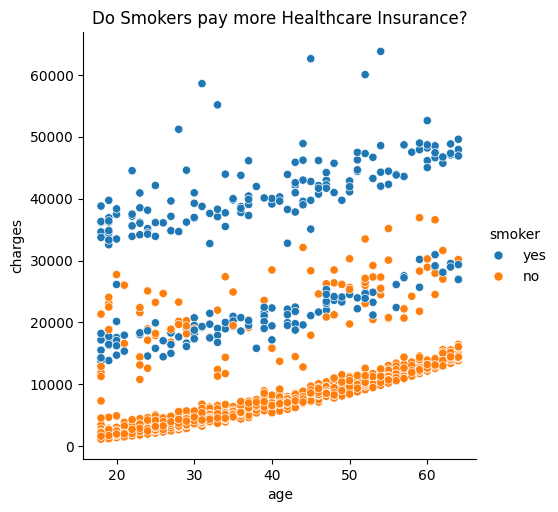

In [67]:
#To do this, let's plot a scatterplot
sns.relplot(x='age', y='charges', data=df, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Do Smokers pay more Healthcare Insurance?")
plt.show()

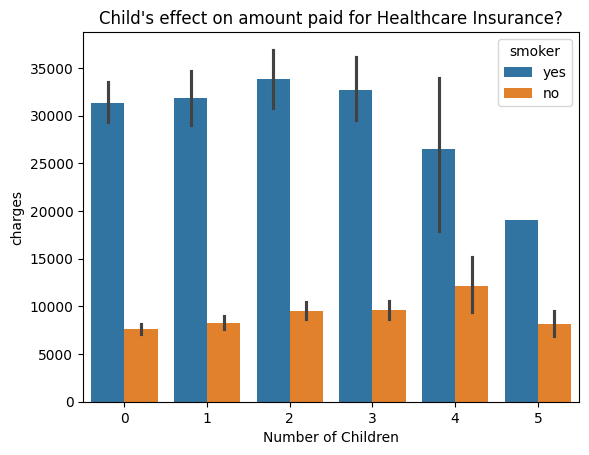

In [68]:
#To do this, let's plot a barplot
sns.barplot(x='children', y='charges', data=df, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("Number of Children")
plt.ylabel("charges")
plt.title("Child's effect on amount paid for Healthcare Insurance?")
plt.show()

In [69]:
# Group by region, sex, and smoker, then calculate mean charges
import plotly.io as pio
pio.renderers.default = "vscode"  # opens plot in browser
plot_df = df.groupby(['region', 'sex', 'smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index()

# Create bar plot
fig = px.bar(
    plot_df,
    x='region',
    y='charges',
    color='sex',
    height=800,
    title="Average Insurance Costs by Region and Smoking Status",
    color_discrete_map={'female': '#107d34', 'male': '#80f7a8'},  # Updated colors
    facet_row='smoker',
    text='charges',
    opacity=0.85,
    barmode='group'
)

# Update traces
fig.update_traces(
    texttemplate='$%{text:,.0f}',
    textposition='outside',
    marker_line=dict(width=1, color='#303030')
)

# Update layout
fig.update_layout(
    yaxis2=dict(matches=None),
    font_color="#303030",
    paper_bgcolor="white",
    plot_bgcolor="white",
    bargroupgap=0.05,
    bargap=0.2,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        title=""
    )
)

# Update axes
fig.update_xaxes(
    title="Region",
    row=1
)
fig.update_yaxes(
    title="Claim Amount, $",
    gridcolor='#E3E3E3',
    zeroline=True,
    zerolinewidth=2,
    showgrid=False,
    zerolinecolor='#E5E5EA',
    showline=True,
    linecolor='#E5E5EA',
    linewidth=2
)

# Format facet annotations
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Show plot
fig.show()

#
 Non-smokers generally incur smaller insurance claims compared to smokers, with average claim amounts being just under $10,000 across all regions. This suggests that non-smokers tend to experience fewer or less severe health issues that require insurance claims. In contrast, smokers have significantly higher average claims, which vary widely from approximately $28,000 to over $36,000, indicating that smoking is associated with more frequent or severe health problems that lead to higher insurance costs.

In [70]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


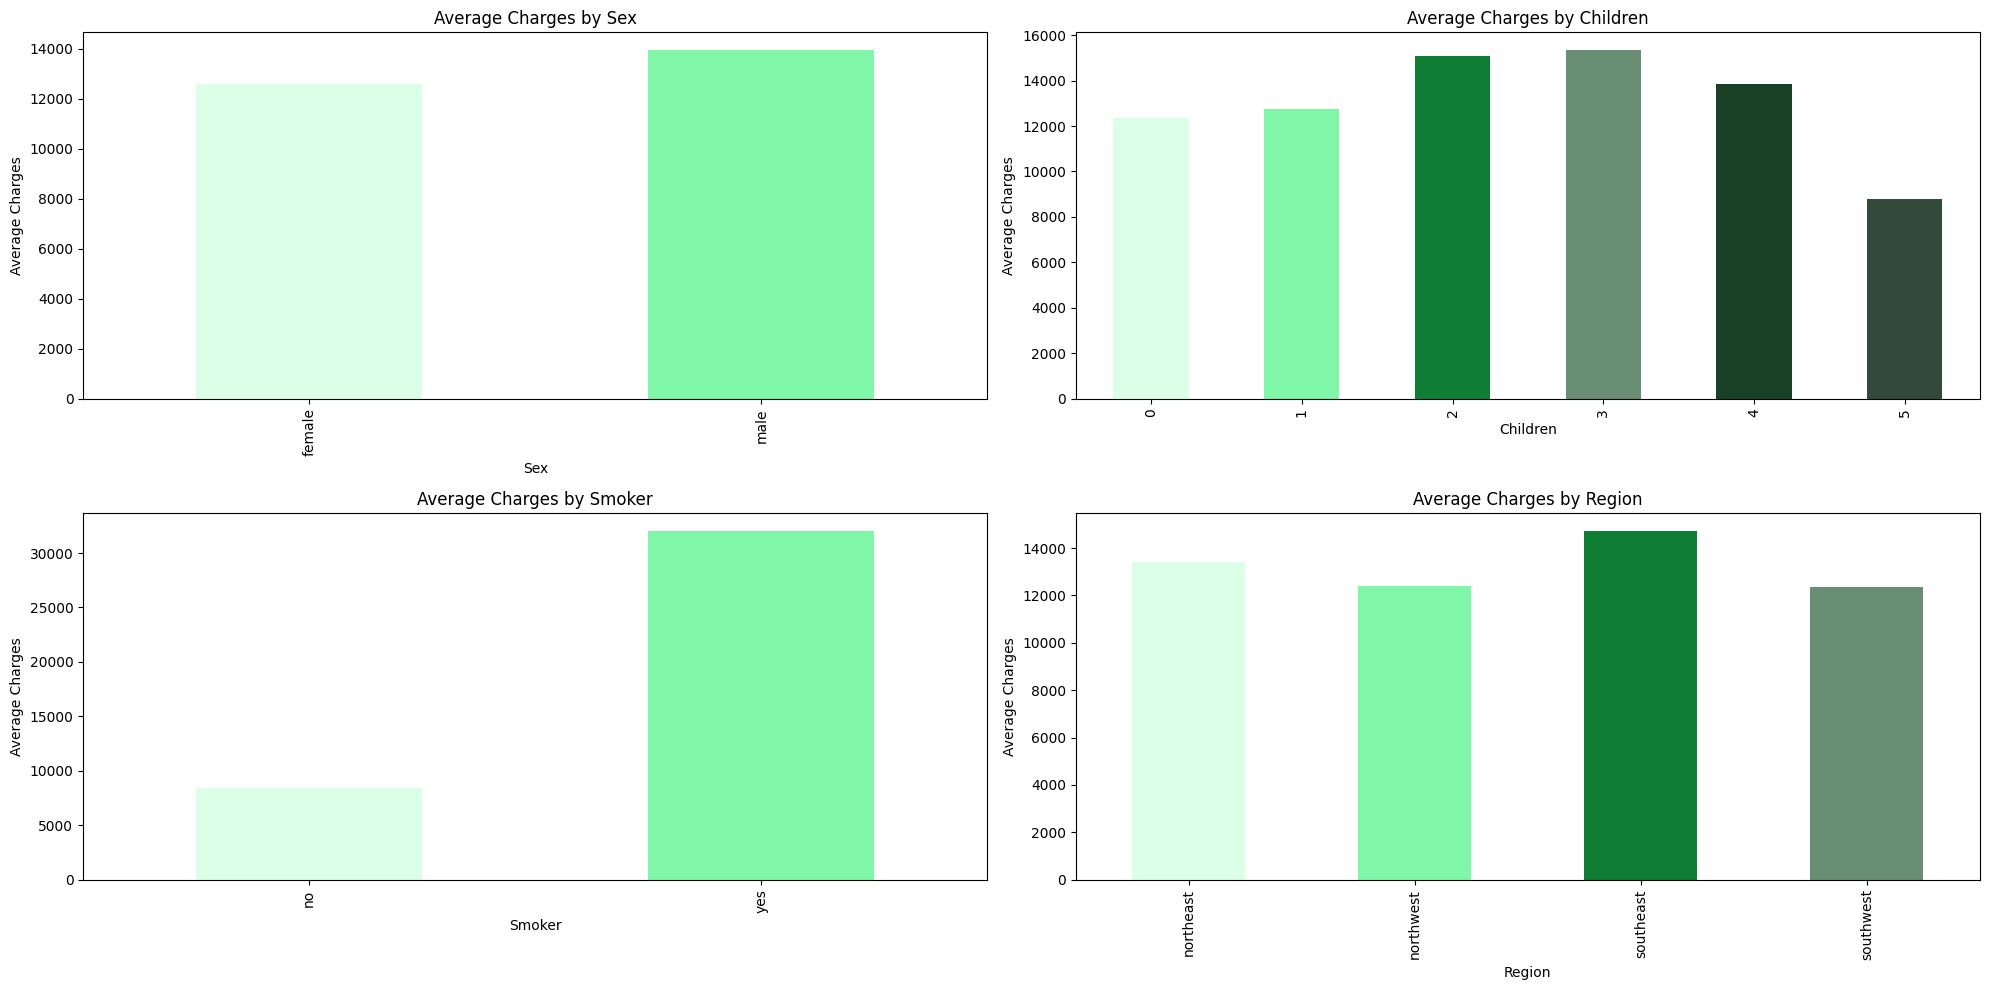

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Define color scheme
color_scheme = ['#dbffe7', '#80f7a8', '#107d34', '#688e74', '#194126', '#314a39']

# Features to plot
features = ['sex', 'children', 'smoker', 'region']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot each feature
for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]
    try:
        # Group by the column and calculate the mean charges
        df_grouped = df.groupby(col).mean(numeric_only=True)['charges']
        # Plot the grouped data with the custom color scheme
        df_grouped.plot.bar(ax=ax, color=color_scheme[:len(df_grouped)])
        ax.set_title(f'Average Charges by {col.capitalize()}')
        ax.set_ylabel('Average Charges')
        ax.set_xlabel(col.capitalize())
    except Exception as e:
        ax.text(0.5, 0.5, f'Error: {str(e)}', ha='center', va='center')
        ax.set_axis_off()

# Adjust layout
plt.tight_layout()
plt.show()

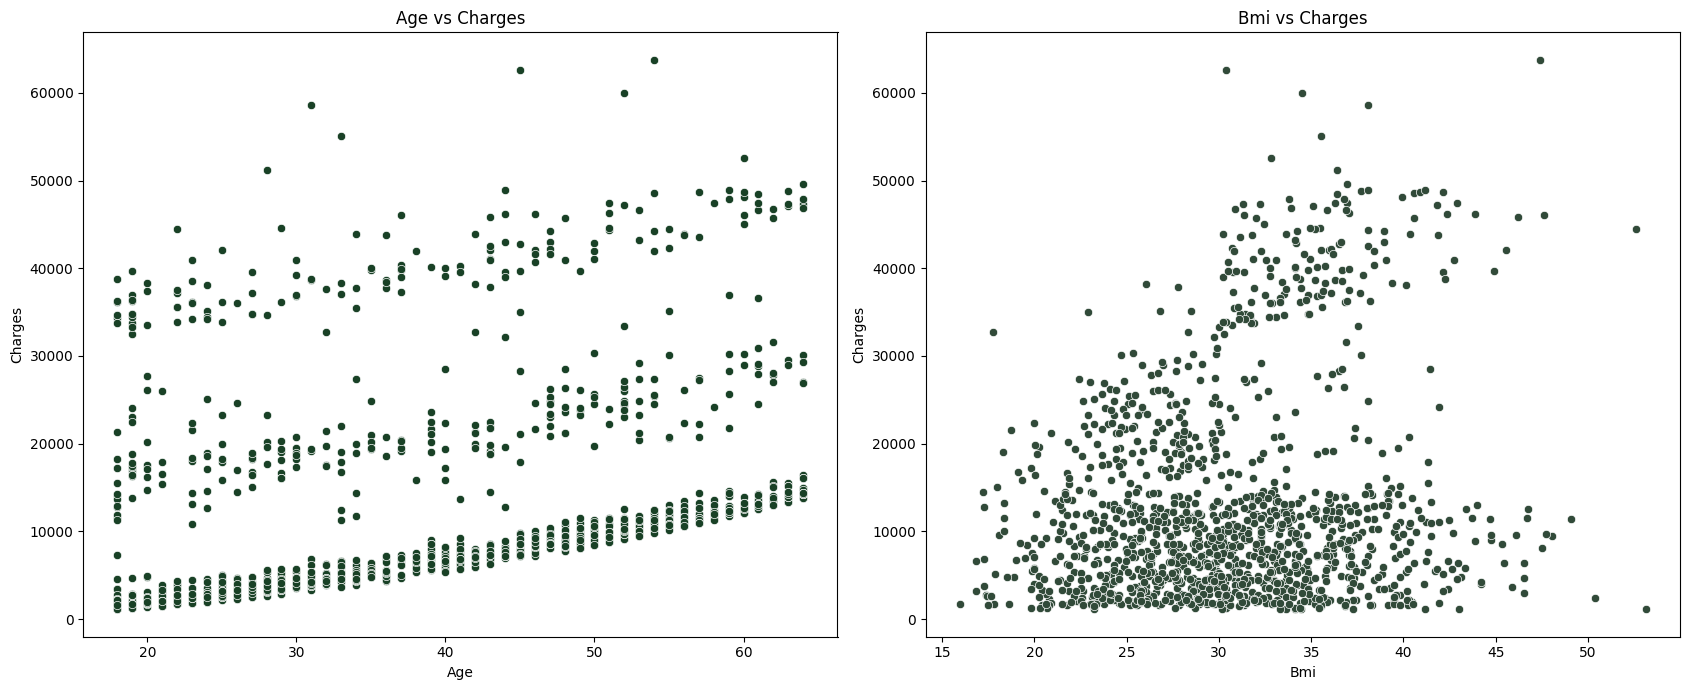

In [72]:
# Features to plot
features = ['age', 'bmi']
color_scheme = ['#194126','#314a39']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 7))

# Plot each feature with specified colors
for i, col in enumerate(features):
    sns.scatterplot(data=df, x=col, y='charges', color=color_scheme[i], ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} vs Charges')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Charges')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#
Machine learning (ML) is revolutionizing the healthcare and insurance industries by enabling more accurate risk assessment, personalized services, and efficient operations. In the health insurance sector, ML models leverage vast amounts of data to predict outcomes, enhance decision-making, and improve customer experiences.
Machine learning is transforming the health insurance industry by enabling more accurate risk assessment, enhancing fraud detection, improving claims management, and personalizing customer interactions. As the technology continues to evolve, its applications in health insurance are expected to grow, driving further innovation and efficiency in the sector. Addressing challenges related to data privacy, bias, and interpretability will be crucial to realizing the full potential of ML in health insurance

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
data = df

# Step 2: Feature Engineering
## 2.1 BMI Category
bins = [0, 18.5, 24.9, 29.9, np.inf]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)

## 2.2 Interaction Term - Smoker and BMI
data['smoker_bmi_interaction'] = data['bmi'] * data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

## 2.3 Age Grouping
bins_age = [0, 18, 35, 50, np.inf]
labels_age = ['Youth', 'Young Adult', 'Middle Aged', 'Senior']
data['age_group'] = pd.cut(data['age'], bins=bins_age, labels=labels_age)

## 2.4 One-Hot Encoding for Categorical Features
categorical_features = ['sex', 'smoker', 'region', 'bmi_category', 'age_group']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

## 2.5 Standardizing Continuous Features (Optional, for later pipeline)
# Continuous features like 'age', 'bmi', 'children', 'smoker_bmi_interaction' can be standardized during model preprocessing.
# For now, we leave them untouched.

# Step 3: Display Transformed Data
print("Transformed Data:\n", data.head())


Transformed Data:
    age     bmi  children      charges  smoker_bmi_interaction  sex_male  \
0   19  27.900         0  16884.92400                    27.9     False   
1   18  33.770         1   1725.55230                     0.0      True   
2   28  33.000         3   4449.46200                     0.0      True   
3   33  22.705         0  21984.47061                     0.0      True   
4   32  28.880         0   3866.85520                     0.0      True   

   smoker_yes  region_northwest  region_southeast  region_southwest  \
0        True             False             False              True   
1       False             False              True             False   
2       False             False              True             False   
3       False              True             False             False   
4       False              True             False             False   

   bmi_category_Normal weight  bmi_category_Overweight  bmi_category_Obese  \
0                       F

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Define features and target
X = data.drop(columns=['charges'])  # Features
y = data['charges']                # Target

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define numerical and categorical columns
numerical_columns = ['age', 'bmi', 'children', 'smoker_bmi_interaction']
categorical_columns = [col for col in X.columns if col not in numerical_columns]

# Step 4: Create preprocessing pipelines
## Numerical data: Standard scaling
numerical_transformer = StandardScaler()

## Categorical data: Pass-through (already one-hot encoded)
categorical_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)


In [76]:
# Step 5: Build a pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 6: Train the model
model_pipeline.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model_pipeline.predict(X_test)

In [77]:
# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Model Performance:
Mean Squared Error (MSE): 20904121.11
R-squared (R2): 0.87


In [ ]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Step 2: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Use R-squared as the scoring metric
    n_jobs=-1,     # Use all available processors
    verbose=2
)

# Step 3: Fit GridSearchCV
print("Starting Grid Search...")
grid_search.fit(X_train, y_train)

# Step 4: Display best parameters and best score
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 5: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print("\nOptimized Model Performance:")
print(f"Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"R-squared (R2): {r2_optimized:.2f}")


In [ ]:
# Extract feature importances
feature_importances = best_model.named_steps['regressor'].feature_importances_
feature_names = numerical_columns + categorical_columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(best_model, 'optimized_insurance_model.pkl')
print("Optimized model saved as 'optimized_insurance_model.pkl'.")

# Load the model (if needed later)
loaded_model = joblib.load('optimized_insurance_model.pkl')


In [ ]:
import joblib
import pandas as pd
import numpy as np

# --- 1. Load the Model and Define Preprocessing ---
try:
    loaded_model = joblib.load('optimized_insurance_model.pkl')
    print("")
except FileNotFoundError:
    print("❌ Error: 'optimized_insurance_model.pkl' not found.")

# The exact columns the model was trained on
final_model_columns = [
    'age', 'bmi', 'children', 'smoker_bmi_interaction', 'sex_male', 'smoker_yes',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal weight', 'bmi_category_Overweight', 'bmi_category_Obese',
    'age_group_Middle Aged', 'age_group_Senior', 'age_group_Young Adult'
]

def preprocess_new_data(df):
    """Applies the same feature engineering as the training script."""
    bins_bmi = [0, 18.5, 24.9, 29.9, np.inf]
    labels_bmi = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
    df['bmi_category'] = pd.cut(df['bmi'], bins=bins_bmi, labels=labels_bmi)
    df['smoker_bmi_interaction'] = df['bmi'] * df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
    bins_age = [0, 18, 35, 50, np.inf]
    labels_age = ['Youth', 'Young Adult', 'Middle Aged', 'Senior']
    df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age)
    processed_df = pd.get_dummies(df, drop_first=True)
    for col in final_model_columns:
        if col not in processed_df.columns:
            processed_df[col] = 0
    return processed_df[final_model_columns]

# --- 2. Get User Input ---
print("\n--- 📋 Enter New Policyholder Details ---")

while True:
    try:
        age = int(input("Enter Age (e.g., 35): "))
        break
    except ValueError:
        print("Invalid input. Please enter a whole number.")

sex = input("Enter Sex (male/female): ").lower()
while sex not in ['male', 'female']:
    sex = input("Invalid input. Please enter 'male' or 'female': ").lower()

while True:
    try:
        bmi = float(input("Enter BMI (e.g., 28.5): "))
        break
    except ValueError:
        print("Invalid input. Please enter a number.")

while True:
    try:
        children = int(input("Enter Number of Children (e.g., 2): "))
        break
    except ValueError:
        print("Invalid input. Please enter a whole number.")

smoker = input("Is the person a smoker? (yes/no): ").lower()
while smoker not in ['yes', 'no']:
    smoker = input("Invalid input. Please enter 'yes' or 'no': ").lower()

region = input("Enter Region (southwest/southeast/northwest/northeast): ").lower()
while region not in ['southwest', 'southeast', 'northwest', 'northeast']:
    region = input("Invalid input. Please enter a valid region: ").lower()

# --- 3. Create DataFrame and Predict ---
user_data = {
    'age': age, 'sex': sex, 'bmi': bmi,
    'children': children, 'smoker': smoker, 'region': region
}
user_df = pd.DataFrame([user_data])
processed_user_data = preprocess_new_data(user_df)
predicted_charge = loaded_model.predict(processed_user_data)

# --- 4. Display the Result ---
print("\n--------------------------------------")
print("---  Model Prediction Result ---")
print(f"Predicted Insurance Charge: ${predicted_charge[0]:,.2f}")
print("--------------------------------------")

✅ Model loaded successfully!

--- 📋 Enter New Policyholder Details ---

--------------------------------------
--- 🚀 Model Prediction Result ---
Predicted Insurance Charge: $5,528.02
--------------------------------------
